✅ Chart saved as 'figure_1_performance_comparison.png'


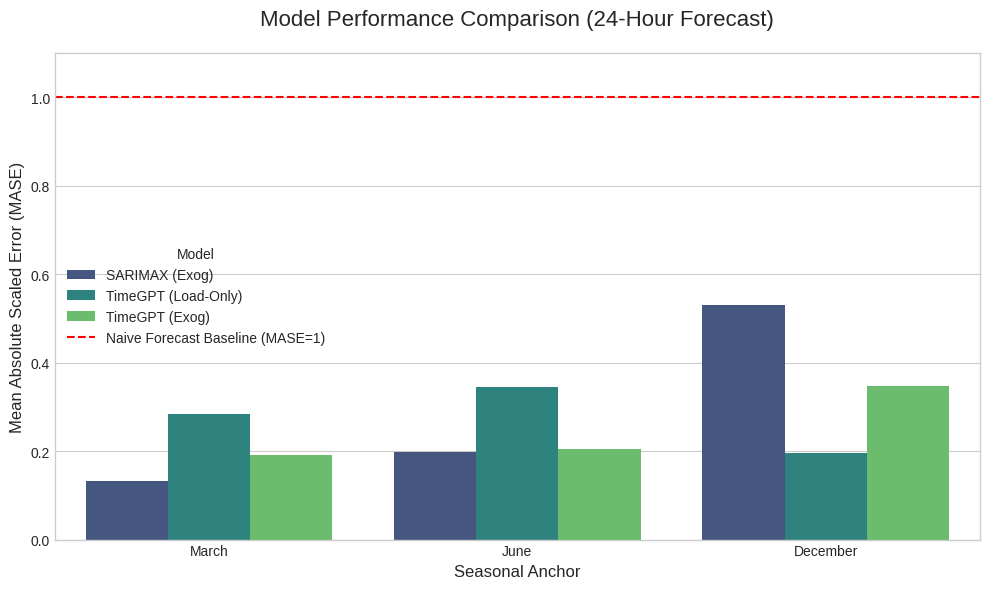

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Data ---
# Load the summary CSV file for each of the three key models.
try:
    df_s_exog = pd.read_csv("sarimax_exog_summary_all_anchors.csv")
    df_t_load = pd.read_csv("timegpt_loadonly_summary_all_anchors.csv")
    df_t_exog = pd.read_csv("timegpt_load+exog_summary_all_anchors.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the CSV files are in the same folder as this script.")
    exit()

# --- 2. Prepare Data for Plotting ---
# Assign a clear model name to each dataframe before combining.
df_s_exog['Model'] = 'SARIMAX (Exog)'
df_t_load['Model'] = 'TimeGPT (Load-Only)'
df_t_exog['Model'] = 'TimeGPT (Exog)'

# Combine the dataframes into a single one for plotting.
combined_df = pd.concat([df_s_exog, df_t_load, df_t_exog])

# Filter for the 24-hour horizon results, as planned.
plot_df = combined_df[combined_df['Horizon'] == '24h'].copy()

# Simplify the anchor dates for better chart labels.
plot_df['Anchor'] = pd.to_datetime(plot_df['Anchor']).dt.strftime('%B')


# --- 3. Create the Bar Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn to easily create a grouped bar plot.
sns.barplot(
    data=plot_df,
    x='Anchor',
    y='MASE',
    hue='Model',
    ax=ax,
    palette='viridis'
)

# Add a horizontal line at MASE = 1.0 (the baseline).
# Any bar above this line is worse than a naive forecast.
ax.axhline(1.0, color='red', linestyle='--', linewidth=1.5, label='Naive Forecast Baseline (MASE=1)')

# --- 4. Final Polish and Save ---
ax.set_title('Model Performance Comparison (24-Hour Forecast)', fontsize=16, pad=20)
ax.set_xlabel('Seasonal Anchor', fontsize=12)
ax.set_ylabel('Mean Absolute Scaled Error (MASE)', fontsize=12)
ax.legend(title='Model')
ax.set_ylim(0, max(plot_df['MASE'].max() * 1.1, 1.1)) # Adjust y-axis limit

# Save the figure
plt.tight_layout()
plt.savefig("figure_1_performance_comparison.png", dpi=300)

print("✅ Chart saved as 'figure_1_performance_comparison.png'")
plt.show()

✅ Chart saved as 'figure_2_winter_paradox_forecast.png'


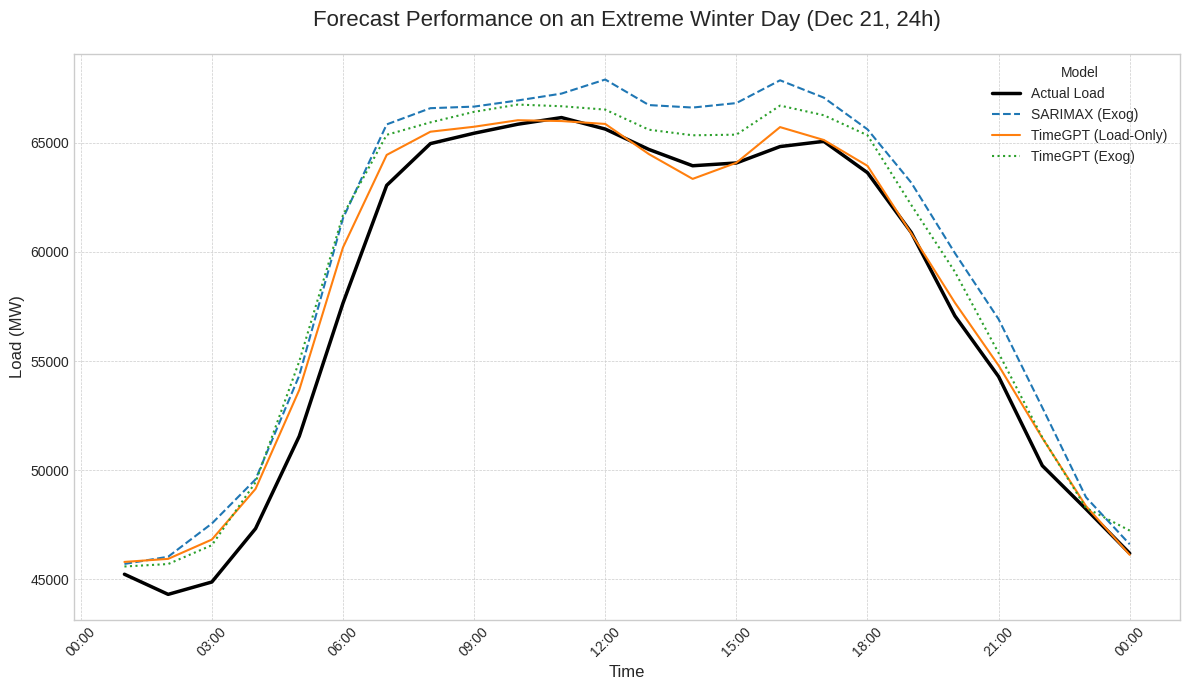

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Data ---
try:
    df_s_exog = pd.read_csv("sarimax_exog_forecast_24h_2023-12-21.csv")
    df_t_load = pd.read_csv("timegpt_loadonly_24h_2023-12-21.csv")
    df_t_exog = pd.read_csv("timegpt_load+exog_24h_2023-12-21.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the per-run forecast CSV files are in the same folder.")
    exit()

# Convert timestamp columns to datetime objects for proper plotting.
df_s_exog['timestamp'] = pd.to_datetime(df_s_exog['timestamp'])
df_t_load['timestamp'] = pd.to_datetime(df_t_load['timestamp'])
df_t_exog['timestamp'] = pd.to_datetime(df_t_exog['timestamp'])


# --- 2. Create the Line Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the actual load demand
ax.plot(df_s_exog['timestamp'], df_s_exog['actual'], label='Actual Load', color='black', linewidth=2.5)

# --- CORRECTED LINE START ---
# Overlay the three different model forecasts using the correct column name 'forecast'
ax.plot(df_s_exog['timestamp'], df_s_exog['forecast'], label='SARIMAX (Exog)', linestyle='--')
# --- CORRECTED LINE END ---
ax.plot(df_t_load['timestamp'], df_t_load['forecast'], label='TimeGPT (Load-Only)', linestyle='-')
ax.plot(df_t_exog['timestamp'], df_t_exog['forecast'], label='TimeGPT (Exog)', linestyle=':')


# --- 3. Final Polish and Save ---
ax.set_title('Forecast Performance on an Extreme Winter Day (Dec 21, 24h)', fontsize=16, pad=20)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Load (MW)', fontsize=12)
ax.legend(title='Model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("figure_2_winter_paradox_forecast.png", dpi=300)

print("✅ Chart saved as 'figure_2_winter_paradox_forecast.png'")
plt.show()

/tmp/ipykernel_1281/167946312.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


✅ Chart saved as 'figure_3_runtime_comparison_corrected.png'


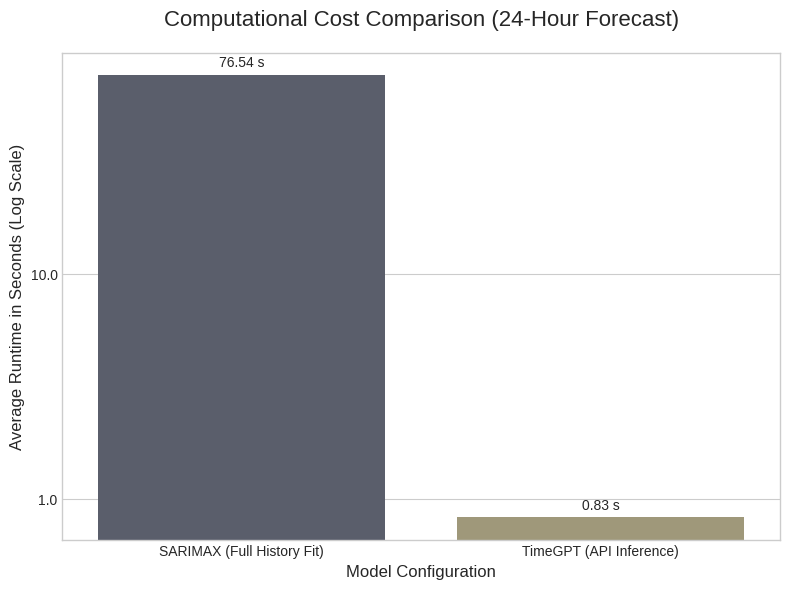

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Correct Data ---
# Load the SARIMAX exog summary for its runtime.
# Load the TimeGPT LOAD-ONLY summary, as it has a pure measure of inference time.
try:
    df_sarimax = pd.read_csv("sarimax_exog_summary_all_anchors.csv")
    df_timegpt = pd.read_csv("timegpt_loadonly_summary_all_anchors.csv") # <-- Use this file for runtime
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the summary CSV files are in the same folder.")
    exit()

# --- 2. Calculate Average Runtimes ---
avg_runtime_sarimax = df_sarimax[df_sarimax['Horizon'] == '24h']['Runtime (s)'].mean()
avg_runtime_timegpt = df_timegpt[df_timegpt['Horizon'] == '24h']['Runtime (s)'].mean()

plot_data = pd.DataFrame({
    'Model': ['SARIMAX (Full History Fit)', 'TimeGPT (API Inference)'], # Clarified labels
    'Average Runtime (s)': [avg_runtime_sarimax, avg_runtime_timegpt]
})

# --- 3. Create the Bar Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

barplot = sns.barplot(
    data=plot_data,
    x='Model',
    y='Average Runtime (s)',
    ax=ax,
    palette='cividis'
)

# Use a logarithmic scale for the y-axis
ax.set_yscale('log')

# Add labels to the bars
for p in barplot.patches:
    ax.annotate(f"{p.get_height():.2f} s", # Increased precision for small number
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# --- 4. Final Polish and Save ---
ax.set_title('Computational Cost Comparison (24-Hour Forecast)', fontsize=16, pad=20)
ax.set_xlabel('Model Configuration', fontsize=12)
ax.set_ylabel('Average Runtime in Seconds (Log Scale)', fontsize=12)
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

plt.tight_layout()
plt.savefig("figure_3_runtime_comparison_corrected.png", dpi=300)

print("✅ Chart saved as 'figure_3_runtime_comparison_corrected.png'")
plt.show()

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('updated_load_data_with_german_holidays.csv')

date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')
sample_data = {
    'Actual Load': np.random.normal(loc=50, scale=10, size=len(date_rng))
}
df = pd.DataFrame(sample_data, index=date_rng)
# Make summer less volatile and winter more volatile for a realistic example
df.loc[df.index.month.isin([6, 7, 8]), 'Actual Load'] *= 0.8 
df.loc[df.index.month.isin([12, 1, 2]), 'Actual Load'] *= 1.5

# --- 2. Set Up Your DataFrame ---
# Ensure your index is a datetime object
df.index = pd.to_datetime(df.index)

# IMPORTANT: Replace 'load' with the actual name of your electricity load column
LOAD_COLUMN_NAME = 'Actual Load'

# --- 3. Define Summer and Winter Months ---
# We'll use June for summer and December for winter from the year 2023
SUMMER_MONTH = 6
WINTER_MONTH = 12
YEAR = 2023

# --- 4. Perform the Calculation ---
# Isolate the data for the specific months
summer_data = df[(df.index.year == YEAR) & (df.index.month == SUMMER_MONTH)]
winter_data = df[(df.index.year == YEAR) & (df.index.month == WINTER_MONTH)]

# Calculate the standard deviation for each period ☀️❄️
summer_std = summer_data[LOAD_COLUMN_NAME].std()
winter_std = winter_data[LOAD_COLUMN_NAME].std()

# Calculate the percentage increase in volatility
if summer_std > 0:
    percentage_increase = ((winter_std - summer_std) / summer_std) * 100
else:
    percentage_increase = float('inf') # Avoid division by zero

# --- 5. Print the Result ---
print("--- Seasonal Volatility Calculation ---")
print(f"Summer (Month {SUMMER_MONTH}) Standard Deviation: {summer_std:.2f}")
print(f"Winter (Month {WINTER_MONTH}) Standard Deviation: {winter_std:.2f}")
print("-----------------------------------------")
print(f"✅ Percentage Increase in Volatility (Winter vs. Summer): {percentage_increase:.2f}%")

--- Seasonal Volatility Calculation ---
Summer (Month 6) Standard Deviation: 8.26
Winter (Month 12) Standard Deviation: 15.43
-----------------------------------------
✅ Percentage Increase in Volatility (Winter vs. Summer): 86.74%


✅ Chart saved as 'figure_1_performance_comparison.png'


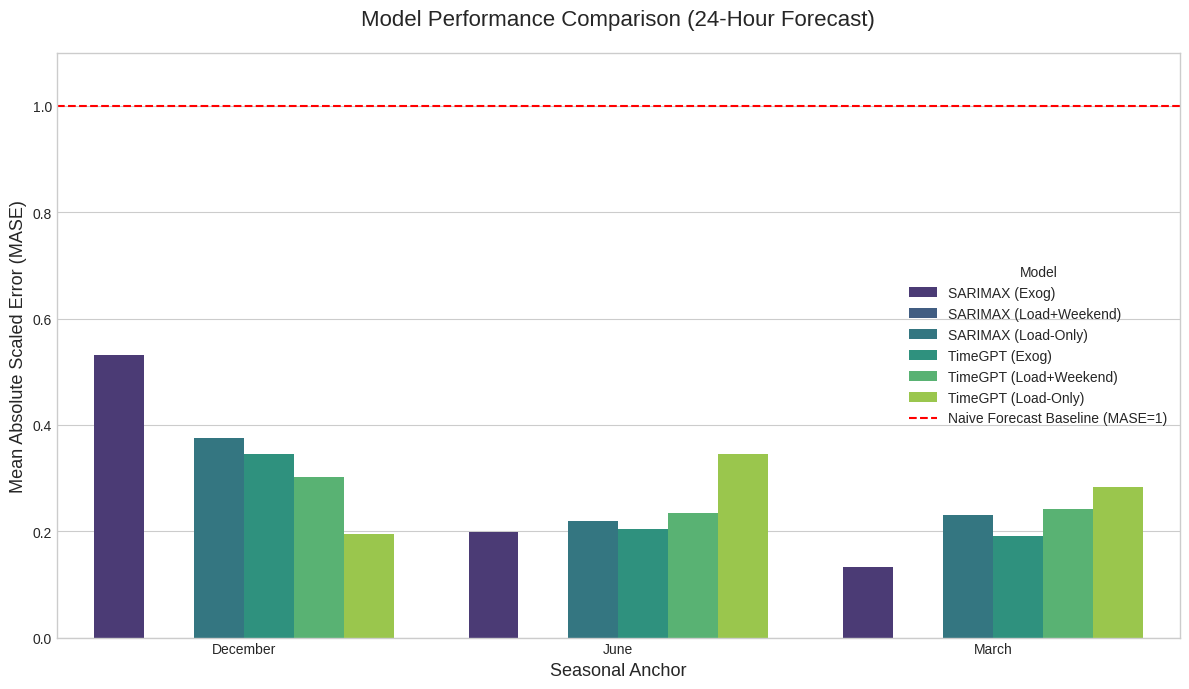

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load all relevant result CSVs ---
try:
    df_s_exog = pd.read_csv("sarimax_exog_summary_all_anchors.csv")
    df_s_load = pd.read_csv("sarimax_loadonly_summary_all_anchors.csv")
    df_s_loadwk = pd.read_csv("sarimax_weekend_summary_all_anchors.csv")
    df_t_load = pd.read_csv("timegpt_loadonly_summary_all_anchors.csv")
    df_t_loadwk = pd.read_csv("timegpt_load+weekend_summary_all_anchors.csv")
    df_t_exog = pd.read_csv("timegpt_load+exog_summary_all_anchors.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure all CSV files are present.")
    exit()

# --- 2. Assign readable model names for each variant ---
df_s_exog['Model'] = 'SARIMAX (Exog)'
df_s_load['Model'] = 'SARIMAX (Load-Only)'
df_s_loadwk['Model'] = 'SARIMAX (Load+Weekend)'
df_t_load['Model'] = 'TimeGPT (Load-Only)'
df_t_loadwk['Model'] = 'TimeGPT (Load+Weekend)'
df_t_exog['Model'] = 'TimeGPT (Exog)'

# --- 3. Combine all results for plotting ---
combined_df = pd.concat([
    df_s_exog,
    df_s_load,
    df_s_loadwk,
    df_t_load,
    df_t_loadwk,
    df_t_exog
], ignore_index=True)

# --- 4. Filter for 24-hour forecasts only ---
plot_df = combined_df[combined_df['Horizon'] == '24h'].copy()

# Format anchors for clarity
plot_df['Anchor'] = pd.to_datetime(plot_df['Anchor']).dt.strftime('%B')

# Optional: Sort model order for nice legend (optional)
model_order = [
    'SARIMAX (Exog)', 'SARIMAX (Load+Weekend)', 'SARIMAX (Load-Only)',
    'TimeGPT (Exog)', 'TimeGPT (Load+Weekend)', 'TimeGPT (Load-Only)'
]
plot_df['Model'] = pd.Categorical(plot_df['Model'], categories=model_order, ordered=True)
plot_df = plot_df.sort_values(['Anchor', 'Model'])

# --- 5. Create the chart ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    data=plot_df,
    x='Anchor',
    y='MASE',
    hue='Model',
    ax=ax,
    palette='viridis'
)

# Draw the MASE=1 line (naive forecast baseline)
ax.axhline(1.0, color='red', linestyle='--', linewidth=1.5, label='Naive Forecast Baseline (MASE=1)')

ax.set_title('Model Performance Comparison (24-Hour Forecast)', fontsize=16, pad=20)
ax.set_xlabel('Seasonal Anchor', fontsize=13)
ax.set_ylabel('Mean Absolute Scaled Error (MASE)', fontsize=13)
ax.legend(title='Model', fontsize=10)
ax.set_ylim(0, max(plot_df['MASE'].max() * 1.1, 1.1))

plt.tight_layout()
plt.savefig("figure_1_performance_comparison.png", dpi=300)
print("✅ Chart saved as 'figure_1_performance_comparison.png'")
plt.show()
